<a href="https://colab.research.google.com/github/Jaksta1/Uczenie_Maszynowe_2025/blob/main/Jakub_Kownacki_praca_domowa_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importujemy potrzebne biblioteki
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# Wczytanie danych z GitHub
# Używamy "raw" linku do CSV
url = "https://raw.githubusercontent.com/SzymonNowakowski/Machine-Learning-2024/master/PCA_three_clusters_data.csv"
data = pd.read_csv(url)

# Wyświetlenie pierwszych kilku wierszy danych
print("Pierwsze wiersze danych:")
print(data.head())

# Sprawdzenie kolumn w danych
print("\nKolumny w danych:", data.columns.tolist())

# Zakładamy, że kolumny 'x', 'y', 'z' to cechy, a 'class' zawiera informacje o klastrach.
features = ['x', 'y', 'z']
X = data[features]


Pierwsze wiersze danych:
          x         y          z  class
0  0.647689 -0.138264   3.512299      0
1 -0.234137 -0.234153  10.769447      0
2 -0.469474  0.767435  11.166721      0
3 -0.465730 -0.463418   3.836479      0
4 -1.724918 -1.913280   1.710932      0

Kolumny w danych: ['x', 'y', 'z', 'class']


----------------------------------------------
# 1. Standaryzacja danych
----------------------------------------------
Standaryzacja jest konieczna przed PCA, ponieważ:
- PCA wyznacza kierunki o maksymalnej wariancji.
- Jeśli cechy mają różne skale, cechy o większej skali mogą dominować wyniki.
- Dzięki standaryzacji każda cecha ma równy wpływ na wynik.

In [3]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

------------------------------------
# 2. PCA: redukcja wymiaru do 2D
------------------------------------

In [4]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_std)

# Tworzymy DataFrame z wynikowymi głównymi składowymi
principalDf = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])

# Dodajemy kolumnę 'class'
principalDf['class'] = data['class']

------------------------------------
# 3. Wizualizacja wyników PCA
------------------------------------

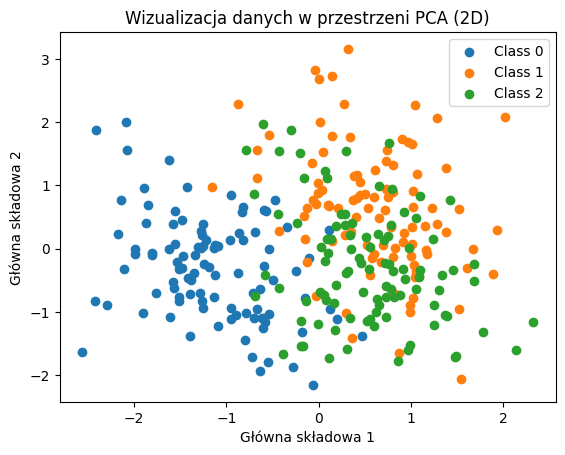

In [8]:
clusters = principalDf['class'].unique()
for cl in clusters:
    indices = principalDf['class'] == cl
    plt.scatter(principalDf.loc[indices, 'PC1'], principalDf.loc[indices, 'PC2'], label=f'Class {cl}')
plt.legend()
plt.xlabel('Główna składowa 1')
plt.ylabel('Główna składowa 2')
plt.title('Wizualizacja danych w przestrzeni PCA (2D)')
plt.show()

------------------------------------
# 4. Wizualizacja oryginalnych par cech i porównanie z wykresem PCA
------------------------------------

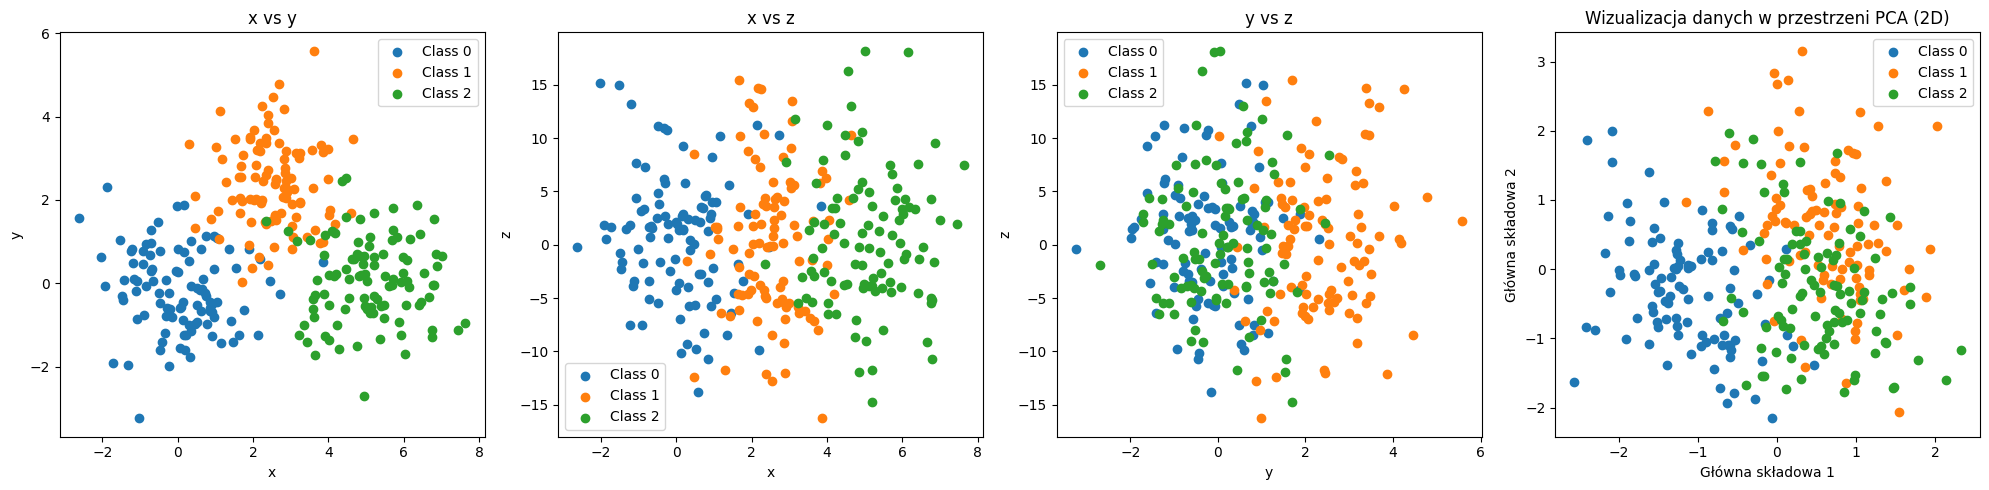

In [18]:
plt.figure(figsize=(20,5))
clusters = data['class'].unique()
# Wykres 1: x vs y
plt.subplot(1, 4, 1)
for cl in clusters:
    indices = data['class'] == cl
    plt.scatter(data.loc[indices, 'x'], data.loc[indices, 'y'], label=f'Class {cl}')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('x vs y')

# Wykres 2: x vs z
plt.subplot(1, 4, 2)
for cl in clusters:
    indices = data['class'] == cl
    plt.scatter(data.loc[indices, 'x'], data.loc[indices, 'z'], label=f'Class {cl}')
plt.legend()
plt.xlabel('x')
plt.ylabel('z')
plt.title('x vs z')

# Wykres 3: y vs z
plt.subplot(1, 4, 3)
for cl in clusters:
    indices = data['class'] == cl
    plt.scatter(data.loc[indices, 'y'], data.loc[indices, 'z'], label=f'Class {cl}')
plt.legend()
plt.xlabel('y')
plt.ylabel('z')
plt.title('y vs z')

# Wykres 4: PCA
plt.subplot(1, 4, 4)
for cl in clusters:
    indices = principalDf['class'] == cl
    plt.scatter(principalDf.loc[indices, 'PC1'], principalDf.loc[indices, 'PC2'], label=f'Class {cl}')
plt.legend()
plt.xlabel('Główna składowa 1')
plt.ylabel('Główna składowa 2')
plt.title('Wizualizacja danych w przestrzeni PCA (2D)')

plt.tight_layout()
plt.show()


------------------------------------
# 5. Wizualizacja wszystkich cech na wykresie 3D
------------------------------------

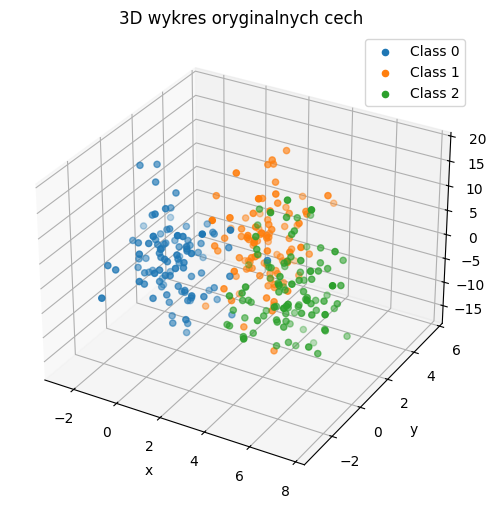

In [10]:
# Utworzenie trójwymiarowego wykresu
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
classes = data['class'].unique()
for cl in classes:
    idx = data['class'] == cl
    ax.scatter(data.loc[idx, 'x'], data.loc[idx, 'y'], data.loc[idx, 'z'], label=f'Class {cl}')
ax.legend()

# Ustawienie etykiet osi i tytułu wykresu
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('3D wykres oryginalnych cech')

plt.show()

# Odpowiedź na pytanie główne
Z perspektywy wykresów widać, że para cech
(
𝑥
,
𝑦
) w oryginalnej przestrzeni całkiem dobrze rozdziela obserwowane klasy. Tymczasem dwie pierwsze składowe PCA, choć nadal ujawniają pewien podział, nie prezentują aż tak wyraźnej separacji. Dzieje się tak, ponieważ PCA koncentruje się na kierunkach o najwyższej całkowitej wariancji w danych, a nie bierze pod uwagę informacji o przynależności do klas. Jeżeli w zbiorze znajduje się cecha lub kombinacja cech, które z natury najlepiej różnicują dane, to może się zdarzyć, że projekcja PCA okaże się mniej skuteczna w wizualnym rozdzieleniu tych klas. Istotą PCA jest kompresowanie wymiarów w taki sposób, by zachować jak najwięcej zmienności, natomiast nie zawsze przekłada się to bezpośrednio na optymalną separację grup.
___________________________________________
# Odpowiedź na pytanie dodatkowe
Standaryzacja danych przed wykonaniem PCA wynika z faktu, że składowe główne wyznaczane są na podstawie wariancji w poszczególnych wymiarach. Gdy cechy różnią się znacznie skalą (na przykład jedna przyjmuje wartości w zakresie od 0 do 1, a inna od 0 do 1000), kierunki głównych składowych mogą być zdominowane przez te cechy o największej amplitudzie. W efekcie wyniki PCA odzwierciedlają głównie tę rozpiętość wartości, a nie rzeczywistą strukturę danych. Poprzez standaryzację, która nadaje wszystkim cechom średnią 0 i wariancję 1, każdy wymiar wnosi równoważny wkład w analizę i zapobiega sytuacji, w której rozbieżność skali zaciemnia pełny obraz układu.